# Trabalho Final - Cálculo Numérico (SME0104)
#### Thales Sena de Queiroz - 14608873
#### Guilherme Pascoale Godoy -

### 1 Sistemas Lineares

**Sistemas lineares** são um conjunto de equações lineares, frequentemente representados na forma matricial $Ax = b$, e constituem um dos problemas mais fundamentais e recorrentes na ciência e engenharia. Resolver um sistema linear significa encontrar o vetor de variáveis $x$ que satisfaz simultaneamente todas as equações. Para sistemas grandes e complexos, métodos numéricos eficientes são essenciais.

A **Decomposição LU** é uma técnica poderosa para resolver sistemas lineares, baseada no método de Eliminação de Gauss.  A ideia é fatorar a matriz de coeficientes $A$ em um produto de duas matrizes: uma triangular inferior $L$ e uma triangular superior $U$, de modo que $A = LU$.  Essa fatoração é extremamente útil, pois transforma o problema original $Ax=b$ em dois sistemas triangulares muito mais simples de resolver, pois $Ax=b$ vira $LUx=b$ colocamos $Ux=y$ então resolvemos $Ly=b$ com substituições progressivas para então resolver $Ux=y$ com substituições regressivas para descobrir os valores de $x$.

### Exemplo: Substituições Progressivas e Regressivas

Após obter a decomposição $A=LU$, o sistema original $Ax=b$ é resolvido em duas etapas:

1.  **Substituição Progressiva**: Resolve-se o sistema triangular inferior $Ly=b$.
2.  **Substituição Regressiva**: Resolve-se o sistema triangular superior $Ux=y$.

---

#### 1. Substituição Progressiva

Resolvemos o sistema $Ly=b$ para encontrar o vetor intermediário $y$. A solução é encontrada progressivamente, da primeira variável ($y_1$) até a última.

**Exemplo:** Dado o sistema $Ly=b$:

$$
\begin{pmatrix}
  1 & 0 & 0 \\
  2 & 1 & 0 \\
  -1 & 3 & 1
\end{pmatrix}
\begin{pmatrix}
  y_1 \\
  y_2 \\
  y_3
\end{pmatrix}
=
\begin{pmatrix}
  5 \\
  12 \\
  4
\end{pmatrix}
$$

* **Passo 1 (Linha 1):**
    $1 \cdot y_1 = 5 \implies y_1 = 5$

* **Passo 2 (Linha 2):**
    $2 \cdot y_1 + 1 \cdot y_2 = 12 \implies 2(5) + y_2 = 12 \implies y_2 = 2$

* **Passo 3 (Linha 3):**
    $-1 \cdot y_1 + 3 \cdot y_2 + 1 \cdot y_3 = 4 \implies -1(5) + 3(2) + y_3 = 4 \implies y_3 = 3$

O vetor solução é $y = [5, 2, 3]^T$.

---

#### 2. Substituição Regressiva

Com o vetor $y$ calculado, resolvemos o sistema $Ux=y$ para encontrar a solução final $x$. A solução é encontrada de forma regressiva, da última variável ($x_3$) até a primeira.

**Exemplo:** Dado o sistema $Ux=y$ (usando o $y$ que acabamos de encontrar):

$$
\begin{pmatrix}
  4 & 2 & 1 \\
  0 & -2 & 1 \\
  0 & 0 & 3
\end{pmatrix}
\begin{pmatrix}
  x_1 \\
  x_2 \\
  x_3
\end{pmatrix}
=
\begin{pmatrix}
  15 \\
  -1 \\
  3
\end{pmatrix}
$$

* **Passo 1 (Linha 3):**
    $3 \cdot x_3 = 3 \implies x_3 = 1$

* **Passo 2 (Linha 2):**
    $-2 \cdot x_2 + 1 \cdot x_3 = -1 \implies -2x_2 + 1(1) = -1 \implies x_2 = 1$

* **Passo 3 (Linha 1):**
    $4 \cdot x_1 + 2 \cdot x_2 + 1 \cdot x_3 = 15 \implies 4x_1 + 2(1) + 1(1) = 15 \implies x_1 = 3$

A solução final do sistema original é $x = [3, 1, 1]^T$.

***

Em muitos problemas práticos, a matriz $A$ possui uma estrutura especial conhecida como **matriz banda**,
$$
A = \begin{pmatrix}
  a_{11} & a_{12} & 0 & 0 & 0 & 0 \\
  a_{21} & a_{22} & a_{23} & 0 & 0 & 0 \\
  0 & a_{32} & a_{33} & a_{34} & 0 & 0 \\
  0 & 0 & a_{43} & a_{44} & a_{45} & 0 \\
  0 & 0 & 0 & a_{54} & a_{55} & a_{56} \\
  0 & 0 & 0 & 0 & a_{65} & a_{66}
\end{pmatrix}
$$
na qual os elementos não nulos se concentram em uma faixa ao redor da diagonal principal. Para esses casos, algoritmos genéricos de decomposição LU, como o apresentado em `func1`, podem ser ineficientes. Por isso, desenvolvem-se métodos otimizados, como o implementado em `func2` , que exploram a esparsidade da matriz para evitar cálculos com os zeros fora da banda, resultando em um ganho de performance significativo.

In [ ]:
import numpy as np
import time

# Função 1: Decomposição LU Padrão
def func1(A):
  # Calcula a decomposição LU de uma matriz A.

  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)
  for j in range(n - 1):
    for i in range(j + 1, n):
      L[i, j] = U[i, j] / U[j, j]
      U[i, j : n] = U[i, j : n] - L[i, j] * U[j, j : n]
  return (L, U)

A = np.array([[2.0, 1.0, 2.0],[4.0, 3.0, 3.0],[6.0,5.0,-1.0]])
x = func1(A)
print(x)

(array([[1., 0., 0.],
       [2., 1., 0.],
       [3., 2., 1.]]), array([[ 2.,  1.,  2.],
       [ 0.,  1., -1.],
       [ 0.,  0., -5.]]))


In [ ]:
def func2 ( A, p ) :
  n = A.shape [ 0 ]
  U = A.copy()
  L = np.eye ( n )
  for j in range ( n - 1 ) :
    v = min ( n , j + p + 1 ) # Redefine os limites do laço, para ficar dentro da faixa de banda.
    for i in range ( j + 1 , v ) :
      L [ i , j ] = U[ i , j ] / U[ j , j ]
      U[ i , j : v ] = U[ i , j : v ] - L [ i , j ] * U[ j , j : v ]
  return ( L , U )

n = 4
p = 2
A = np.zeros(( n , n ))
for i in range ( n ) :
  for j in range ( max( 0 , i - p ) , min ( n , i + p + 1 ) ) :
    A[ i , j ] = np.random.normal( )
x = func2(A, p)
print(x)

(array([[  1.        ,   0.        ,   0.        ,   0.        ],
       [ -0.74863527,   1.        ,   0.        ,   0.        ],
       [  4.13991448, -16.44621307,   1.        ,   0.        ],
       [  0.        ,   2.56188763,  -0.22265507,   1.        ]]), array([[ 3.61374997e-01, -1.37970587e+00, -2.26931449e-01,
         0.00000000e+00],
       [ 0.00000000e+00, -3.16210269e-01, -8.38460415e-01,
        -1.16572602e+00],
       [ 0.00000000e+00,  8.88178420e-16, -1.26981744e+01,
        -2.07712912e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.08764518e+00]]))


In [ ]:
n = 2000
p = 2
A = np.zeros(( n , n ))

#criando uma matriz banda
for i in range ( n ) :
  for j in range ( max( 0 , i - p ) , min ( n , i + p + 1 ) ) :
    A[ i , j ] = np.random.normal( )

print(A)
# Variáveis para cálculo do tempo de execução.
start_time = time.time( )
( L , U ) = func1 ( A )
end_time = time.time( )
print(end_time - start_time)
start_time = time.time( )
( L_ , U_ ) = func2 ( A , p )
end_time = time.time( )
print(end_time - start_time)
# Cálculo do erro entre LU e A.
print( np.linalg.norm( (L @ U) - A ) )
print( np.linalg.norm( (L_ @ U_) - A ) )

print(  (L @ U) - A )
print(  (L_[0:3, 0 : 3] @ U_[0:3, 0:3]) - A[0:3, 0:3] )

[[ 1.47590803  0.00465928 -0.01104584 ...  0.          0.
   0.        ]
 [ 0.2144591  -0.30634202 -1.85939464 ...  0.          0.
   0.        ]
 [-0.46630207 -1.21143035 -1.33903298 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.30777623  0.51966309
  -0.84112048]
 [ 0.          0.          0.         ...  0.45339369  0.10493923
  -0.44004612]
 [ 0.          0.          0.         ... -0.26679681 -0.94740405
   0.70532085]]
5.269509315490723
0.013902664184570312
3.291223989654436e-13
3.291223989654436e-13
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.44089210e-16 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  0.000

### Conclusões
Ambas as funções possuem o mesmo ultimato, realizar a decomposição $LU$ de uma matriz $A$, onde $L$ é uma matriz triangular inferior e $U$ é uma matriz triangular inferior tal que $A = LU$.

`func1(A)`: Esta função implementa o algoritmo de decomposição $LU$ padrão. Ela percorre as colunas $j$ e, para cada uma, zera os elementos abaixo da diagonal na coluna $j$ da matriz $U$, armazenando os multiplicadores na matriz $L$. Ela opera em toda a extensão das linhas da matriz.

`func2(A, p)`: Esta função é uma versão otimizada do algoritmo para matrizes banda. Uma matriz banda é uma matriz esparsa onde os elementos não nulos estão confinados em uma banda diagonal. O parâmetro $p$ define a largura da banda. A otimização ocorre no laço interno: `for i in range(j + 1, v)`, onde `v = min(n, j + p + 1)`. Isso faz com que os cálculos de eliminação sejam realizados apenas dentro da banda, ignorando os zeros fora dela. Isso resulta em uma performance muito superior para matrizes que possuem essa estrutura.

Ambas as funções calculam corretamente as matrizes $L$ e $U$. No entanto, percebe-se uma melhora significativa na eficiência da função $func2$: esta leva $0.013$ segundos para ser executada, enquanto a $func1$ leva $5$ segundos. Isso ocorre pois a segunda função explora a esparsidade da matriz de banda, limitando até onde deve ser iterado pois existem diversos zeros distibuídos para além de uma faixa diagonal ao redor da diagonal principal.

### 2 Zeros de Funções e Sistemas Não Lineares

Enquanto sistemas de equações lineares podem ser resolvidos por métodos diretos, muitos problemas em engenharia e ciências envolvem **equações não lineares**, cuja solução exata geralmente não é viável. O objetivo, então, é encontrar os **"zeros" ou "raízes"** da função, ou seja, os valores de $x$ para os quais $f(x)=0$. O problema proposto na tarefa, de encontrar a intersecção de duas curvas, $p(x)$ e $q(x)$, é um exemplo clássico que se reduz a encontrar a raiz da função diferença $f(x) = p(x) - q(x) = 0$.

Para isso, são empregados **métodos numéricos iterativos**, que geram uma sequência de aproximações que convergem para a raiz. Iremos abordar dois desses métodos fundamentais: o Método da Bisseção e o Método de Newton.

***

### Exemplo: Métodos Iterativos para Zeros de Funções

Vamos encontrar a raiz da função $f(x) = x^2 - 4$ (cujas raízes exatas são $x=2$ e $x=-2$).

---

#### 1. Método da Bisseção

Este método parte de um intervalo $[a, b]$ onde a função troca de sinal ($f(a) \cdot f(b) < 0$), garantindo a existência de ao menos uma raiz. O intervalo é repetidamente dividido pela metade, e a busca continua no subintervalo que mantém a troca de sinal, convergindo de forma lenta, mas segura, para a raiz.

**Exemplo:** Encontrando a raiz de $f(x) = x^2 - 4$ no intervalo $[1, 4]$.

* **Verificação:** $f(1) = -3$ e $f(4) = 12$. Como os sinais são opostos, existe uma raiz no intervalo.
* **Iteração 1:**
    O ponto médio é $c = (1+4)/2 = 2.5$.
    $f(2.5) = 2.25$. O sinal é positivo. O novo intervalo é $[1, 2.5]$.
* **Iteração 2:**
    O ponto médio é $c = (1+2.5)/2 = 1.75$.
    $f(1.75) = -0.9375$. O sinal é negativo. O novo intervalo é $[1.75, 2.5]$.

O método continuaria até que a largura do intervalo seja menor que a tolerância desejada.

---

#### 2. Método de Newton

Este método é geralmente mais rápido, mas requer um bom "chute" inicial $x_0$ e o cálculo da derivada da função, $f'(x)$. A cada passo, uma nova aproximação é calculada pela fórmula:

$$ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)} $$

**Exemplo:** Encontrando a raiz de $f(x) = x^2 - 4$ com chute inicial $x_0 = 1$. A derivada é $f'(x) = 2x$.

* **Iteração 1:**
    $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} = 1 - \frac{1^2 - 4}{2(1)} = 1 - \frac{-3}{2} = 2.5$

* **Iteração 2:**
    $x_2 = x_1 - \frac{f(x_1)}{f'(x_1)} = 2.5 - \frac{2.5^2 - 4}{2(2.5)} = 2.5 - \frac{2.25}{5} = 2.05$

Note como o Método de Newton se aproximou da raiz $x=2$ muito mais rapidamente.

***
##### (a) O problema pode ser visto como encontrar uma raíz da função $f(x) = p(x) - q(x)$, dado que queremos o ponto onde $p(x) - q(x)$, o que implica $f(x) = 0$. Para que o Método da Bisseção funcione, devemos usar um intervalo [a, b] tal que $f(a) \cdot f(b) < 0$.

Vamos observar o grafico da f(x) no intervalo [0, 4].

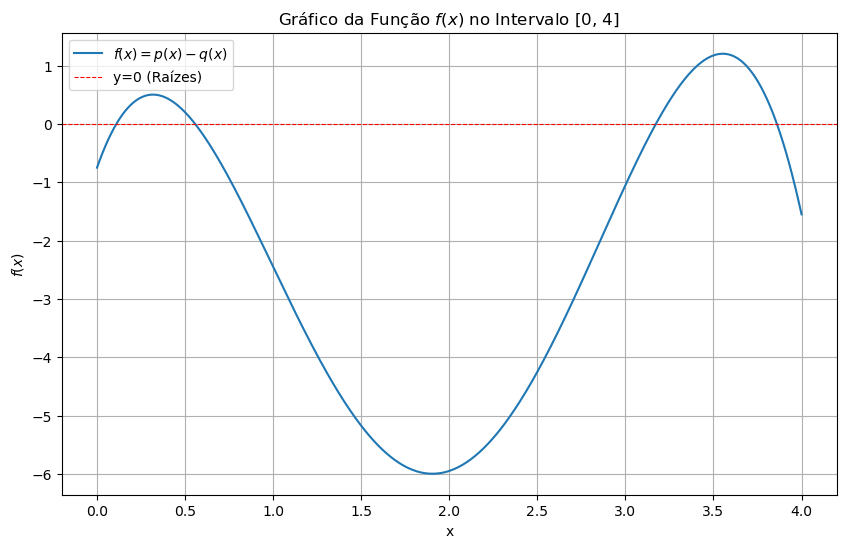

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição da função f(x) = p(x) - q(x) da Questão 2
f = lambda x: -x**4 + 7.7*x**3 - 17*x**2 + 8.6*x - 0.75

# Criação do intervalo de x de 0 a 4
x_vals = np.linspace(0, 4, 500)
y_vals = f(x_vals)

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = p(x) - q(x)$')
# Adiciona uma linha horizontal em y=0 para visualizar as raízes
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='y=0 (Raízes)')
plt.title('Gráfico da Função $f(x)$ no Intervalo [0, 4]')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()

# Salva a figura
plt.savefig('grafico_fx.png')

Analisando o gráfico dado na questão, sabemos que o impacto de maior elevação acontece no intervalo $[2, 4]$, agora escolhemos um subintervalo olhando para o comportamento da f(x) pois precisamos garantir que nesse subintervalo $[a, b]$ ocorra $f(a)*f(b)<0$, escolheremos então [2.5, 3.5].

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição das funções
p = lambda x: -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x
q = lambda x: -x**2 + 5*x + 0.75
f = lambda x: p(x) - q(x)

# --- Método da Bisseção ---
def bissecao(func, a, b, tol=0.001, max_iter=5):
    if func(a) * func(b) >= 0:
        print("O Teorema de Bolzano não garante a existência de raiz no intervalo.")
        return None

    iter_count = 0
    while (b - a) / 2.0 > tol and iter_count < max_iter:
        c = (a + b) / 2.0
        if func(c) == 0:
            break
        elif func(a) * func(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
        print(f"Iteração {iter_count}: Raiz aproximada = {c:.6f}")

    raiz = (a + b) / 2.0
    return raiz

# Execução da Bisseção
print("--- Método da Bisseção ---")
# O gráfico sugere que a raiz da "maior elevação" está entre 3 e 4.
intervalo_a = 2.5
intervalo_b = 3.5
raiz_bissecao = bissecao(f, intervalo_a, intervalo_b, tol=0.001, max_iter=5)

if raiz_bissecao is not None:
    altura_impacto = q(raiz_bissecao)
    print(f"\nRaiz encontrada (x*): {raiz_bissecao:.6f}")
    print(f"Altura do impacto (p(x*)): {altura_impacto:.6f}")

--- Método da Bisseção ---
Iteração 1: Raiz aproximada = 3.000000
Iteração 2: Raiz aproximada = 3.250000
Iteração 3: Raiz aproximada = 3.125000
Iteração 4: Raiz aproximada = 3.187500
Iteração 5: Raiz aproximada = 3.156250

Raiz encontrada (x*): 3.171875
Altura do impacto (p(x*)): 6.548584


Utilizando uma função pronta da biblioteca numpy do python para comparar com o resultado que tivemos com o método da Bisseção.

In [ ]:
import numpy as np

# Coeficientes do polinômio f(x) = -1*x^4 + 7.7*x^3 - 17*x^2 + 8.6*x - 0.75
# (da maior potência para a menor)
coeficientes = [-1, 7.7, -17, 8.6, -0.75]

# Encontra todas as raízes (reais e complexas)
raizes = np.roots(coeficientes)

print("Todas as raízes encontradas pela função np.roots():")
print(raizes)

# Filtra para mostrar apenas as raízes reais
raizes_reais = raizes[np.isreal(raizes)].real

print("\nApenas as raízes reais:")
print(raizes_reais)

Todas as raízes encontradas pela função np.roots():
[3.86007415 3.1729163  0.55708788 0.10992166]

Apenas as raízes reais:
[3.86007415 3.1729163  0.55708788 0.10992166]


Comparando os resultados, nota-se que a raíz encontrada pelo Método da Bisseção é bem próxima de uma das raízes dada por np.roots(), com diferença aproximada de 0.0011. Dada a limitação de 5 iterações, o resultado pode ser considerado bastante satisfatório.

#### b) Formulação como $ F:\mathbb{R}^2 \to \mathbb{R}^2 $

##### Como Funciona o Algoritmo de Newton para Sistemas

O Método de Newton para sistemas de equações não lineares é uma generalização do método para uma única variável. A ideia central é a mesma: em vez de tentar resolver o sistema não linear complexo de uma vez, nós o aproximamos por um **sistema linear** mais simples a cada iteração, e resolvemos esse sistema para encontrar uma aproximação cada vez melhor da raiz.

---

##### 1. A Linearização com a Matriz Jacobiana

Para uma única variável, usamos a reta tangente (a derivada) para linearizar a função. Para um sistema de múltiplas variáveis, como $F:\mathbb{R}^2 \to \mathbb{R}^2$, a generalização da derivada é a **Matriz Jacobiana** $J(\mathbf{X})$.

A Jacobiana é uma matriz que contém todas as derivadas parciais do sistema. Para o seu problema, ela é:
$$
J_F(x,y)
=
\begin{pmatrix}
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y} \\[6pt]
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
p'(x) & -1 \\[4pt]
q'(x) & -1
\end{pmatrix}
$$
* **O que ela representa?** A Jacobiana $J(\mathbf{X})$ descreve como o sistema $F(\mathbf{X})$ se comporta na vizinhança de um ponto $\mathbf{X}$. Ela nos dá a "inclinação" multidimensional do sistema, que é a melhor aproximação linear (um plano tangente) para a função naquele ponto.
* **Jacobiana vs. Gradiente:** Enquanto o *vetor gradiente* ($\nabla f$) é a generalização da derivada para funções de várias variáveis com resultado escalar ($f: \mathbb{R}^n \to \mathbb{R}$), a *matriz Jacobiana* é a generalização para funções com resultado vetorial ($F: \mathbb{R}^n \to \mathbb{R}^m$). As linhas da Jacobiana são, na verdade, os gradientes de cada uma das funções componentes do sistema.

---

##### 2. O Passo a Passo do Algoritmo

O método gera uma sequência de vetores $\{\mathbf{X}_0, \mathbf{X}_1, \mathbf{X}_2, ...\}$ que, espera-se, convirja para a raiz $\boldsymbol{\alpha}$ onde $F(\boldsymbol{\alpha}) = \mathbf{0}$.

###### **Inicialização**

O algoritmo começa com um "chute inicial" $\mathbf{X}_0$.

```python
# Chute inicial perto da raiz esperada
X0 = np.array([2.5, q(2.5)])
# Inicia a sequência com esse chute
X = X0.copy()
```

###### **O Loop Iterativo (`for k in range(...)`)**

O núcleo do método é um loop que refina a aproximação a cada passo. O processo para quando um critério de parada é satisfeito.

###### **O Coração do Método: Resolvendo o Sistema Linear**

Estas duas linhas são a parte mais importante:

```python
Fx = F(X)
Jx = J(X)
delta = np.linalg.solve(Jx, Fx)
```

1.  **Aproximação por Taylor:** O método de Newton lineariza a função $F$ em torno da aproximação atual $\mathbf{X}_k$. Usando a série de Taylor para funções vetoriais, queremos encontrar um pequeno passo $\mathbf{v}_k$ tal que o próximo ponto, $\boldsymbol{\alpha} = \mathbf{X}_k + \mathbf{v}_k$, seja a raiz.
    $$
    \mathbf{0} = F(\boldsymbol{\alpha}) = F(\mathbf{X}_k + \mathbf{v}_k) \approx F(\mathbf{X}_k) + J(\mathbf{X}_k)\mathbf{v}_k
    $$
2.**O Sistema Linear:** Rearranjando a equação acima, obtemos um sistema de equações *lineares* para o passo de atualização $\mathbf{v}_k$:
    $$
    J(\mathbf{X}_k)\mathbf{v}_k = -F(\mathbf{X}_k)
    $$
    Isso é exatamente o que a linha `np.linalg.solve(Jx, Fx)` faz, mas com uma pequena variação de sinal para conveniência. No seu código, $\mathbf{\delta}$ é calculado a partir de $J_k \cdot \mathbf{\delta} = F_k$. Portanto, $\mathbf{\delta} = J_k^{-1} F_k$.

###### **Atualizando a Solução**

Uma vez que o passo de correção (`delta`) é calculado, a nova aproximação $\mathbf{X}_{k+1}$ é encontrada:

```python
X_next = X - delta
```

Isso corresponde à fórmula de iteração do Método de Newton para sistemas:
$$\mathbf{X}_{k+1} = \mathbf{X}_k - J(\mathbf{X}_k)^{-1} F(\mathbf{X}_k)$$
onde o termo $J^{-1}F$ é o nosso `delta`.

##### **Critério de Parada**

O loop continua até que a mudança de uma iteração para a outra seja pequena o suficiente.

```python
if np.linalg.norm(X_next - X) < tol:
    # ... convergiu
```

Isso corresponde ao critério de parada por erro absoluto, mas aplicado à norma do vetor de atualização $\mathbf{\delta} = \mathbf{X}_{k+1} - \mathbf{X}_k$. Se a "distância" entre a aproximação atual e a próxima for menor que uma tolerância `tol`, consideramos que o método convergiu.

In [ ]:
import numpy as np

# 1. Definição das funções e derivadas
def p(x):
    return -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x

def q(x):
    return -x**2 + 5*x + 0.75

def dp(x):
    return -4*x**3 + 3*7.7*x**2 - 36*x + 13.6

def dq(x):
    return -2*x + 5

# 2. Sistema F : R² → R² e sua Jacobiana
def F(X):
    x, y = X
    return np.array([p(x) - y,
                     q(x) - y])

def J(X):
    x, y = X
    return np.array([[dp(x), -1],
                     [dq(x), -1]])

# 3. Método de Newton para sistemas
def newton_system(F, J, X0, tol=1e-3, max_iter=50):
    X = X0.copy()
    for k in range(1, max_iter+1):
        Fx = F(X)
        Jx = J(X)
        # resolve J(x_k) · delta = F(x_k)
        delta = np.linalg.solve(Jx, Fx)
        X_next = X - delta
        if np.linalg.norm(X_next - X) < tol:
            print(f"Convergiu em {k} iterações")
            return X_next
        X = X_next
    raise RuntimeError("Não convergiu em {max_iter} iterações")

# 4. Chute inicial e execução
X0 = np.array([2.5, q(2.5)])   # por exemplo, x=4, y=q(4)
root = newton_system(F, J, X0)

x_star, y_star = root
print(f"Raiz encontrada: x* = {x_star:.6f}, y* = {y_star:.6f}")


Convergiu em 4 iterações
Raiz encontrada: x* = 3.172916, y* = 6.547184


### 3 Decomposição em Valores Singulares (SVD) e o Método de Francis

A **Decomposição em Valores Singulares**, ou **SVD**, é uma das mais importantes e úteis fatorações de matrizes da álgebra linear. Ela afirma que qualquer matriz $A$ de tamanho $m \times n$ pode ser decomposta no produto de três outras matrizes com propriedades especiais:
$$
A = U \Sigma V^T
$$
Onde:
-   **$U$** é uma matriz ortogonal $m \times n$ cujas colunas são os **vetores singulares à esquerda**.
-   **$\Sigma$** (Sigma) é uma matriz diagonal $m \times n$ que contém os **valores singulares** ($\sigma_1, \sigma_2, ...$) em sua diagonal. Esses valores são sempre reais e não negativos, e por convenção, são ordenados do maior para o menor.
-   **$V^T$** é a transposta de uma matriz ortogonal $n \times n$ **$V$**, cujas colunas são os **vetores singulares à direita**.

A SVD é poderosa porque revela a estrutura geométrica fundamental de uma matriz e tem aplicações vastas, como na compressão de dados e imagens. A ideia da compressão é que os primeiros valores singulares (os maiores) capturam a maior parte da "informação" ou "energia" da matriz. Ao descartar os valores singulares menores, podemos criar uma aproximação de baixo ranque da matriz original que ocupa muito menos espaço.

---

#### O Método de Francis (Iteração QR)

Para calcular a SVD, precisamos encontrar os autovalores e autovetores de matrizes associadas a $A$ (especificamente $A^TA$ ou $AA^T$). O **Método de Francis**, também conhecido como **Iteração QR**, é um algoritmo iterativo robusto para encontrar todos os autovalores de uma matriz.

O processo funciona da seguinte maneira:
1.  Comece com a matriz da qual você quer os autovalores, digamos $B_1 = B$.
2.  Em um loop, para $k=1, 2, ...$:
    a.  Realize a **Decomposição QR** na matriz atual: $B_k = Q_k R_k$.
    b.  Calcule a próxima matriz na sequência multiplicando os fatores na ordem inversa: $B_{k+1} = R_k Q_k$.
3.  Repita o passo 2 até a convergência. A sequência de matrizes $B_k$ converge para uma matriz triangular (ou diagonal, se $B$ for simétrica), cujos elementos da diagonal são os autovalores de $B$.

---

#### A Decomposição QR

A **Decomposição QR** é o pilar do Método de Francis. Ela fatora qualquer matriz $M$ em um produto de uma matriz ortogonal $Q$ e uma matriz triangular superior $R$ ($M = QR$).
-   Uma matriz **ortogonal** ($Q$) tem a propriedade de que sua transposta é sua inversa ($Q^T Q = I$), o que significa que ela preserva comprimentos e ângulos.
-   Uma matriz **triangular superior** ($R$) tem todos os seus elementos abaixo da diagonal principal iguais a zero.

Em cada passo da iteração QR, essa decomposição é calculada.

---

a) implementação do método de francis.

In [ ]:
import numpy as np

# Implementação do Método de Francis
def francis_qr_iteration(B, max_iter=1000, tol=1e-6):

    # Encontra os autovalores e autovetores de uma matriz B simétrica
    # usando o método de iteração QR (Francis).

    Bk = B.copy()
    n = B.shape[0]
    V = np.eye(n) # Matriz para acumular os autovetores

    for k in range(max_iter):
        # Decomposição QR do B atual
        Q, R = np.linalg.qr(Bk)
        Bk = R @ Q # Próxima iteração calcula-se Bk+1 com Bk+1 = Rk & Qk

        V = V @ Q # Acumula as transformações ortogonais

        # Critério de parada: verificar se a parte fora da diagonal é pequena max(i<j) {bij} < tol
        off_diag = np.sum(np.abs(Bk - np.diag(np.diag(Bk))))
        if off_diag < tol:
            break

    autovalores = np.diag(Bk)
    autovetores = V
    return autovalores, autovetores

b)

c)

### 4 Interpolação

Dada uma função avaliada em $n+1$ pontos, $(x_0, y_0), ... , (x_n, y_n)$, com $x_0 < x_1 < ... < x_n$, a ideia da interpolação polinomial é encontrar um polinômio de $P_n(x) = a_0 + a_1x + ... + a_nx^n$ que satisfaça $P_n(x_i) = y_i$. \\
Vamos mostrar que tal polinômio existe e é único.
Pela condição imposta:
$$
y_i = P_n(x_i) = a_o + a_1x_i + ... + a_n{x_i}^n, i= 0 , ... , n
$$
Matricialmente, temos:
$$
\begin{pmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^n
\end{pmatrix}
\cdot
\begin{pmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{pmatrix}
=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$
A matriz que aparece do lado esquerdo da equação é uma matriz de Vandermond, $Χ$, e seu determinante pode ser calculado por:
$$
det(Χ) = \prod_{i<k}(x_k - x_i)
$$
Logo, $det(Χ) \neq 0$, pois $x_i \neq x_k$, para $i\neq k$. Então, o sistema acima tem uma única solução. \\
#### Mas como calcular $P_n(x)$?
Um jeito é usando a forma de Lagrange:
$$
P_n(x) = \sum_{k=0}^ny_kl_k(x) \\
l_k = \prod_{i=0, i \neq k}^{n}\frac{x - x_i}{x_k - x_i}
$$
Outra forma é a de Newton, que usa diferenças divididas:
$$
P_n(x) = a_0 + a_1(x - x_0) + a_2(x-x_0)(x-x_1) + ... + a_n(x-x_0)(x-x_1)...(x-x_{n-1}) \\
a_k = f[x_0, x_1, ..., x_k], k = 0, 1, ..., n
$$
Como o polinômio que satisfaz à condição imposta é único, as formas de Lagrange e de Newton resultam no mesmo polinômio. \\
A forma de Lagrange oferece maior simplicidade na implementação. No entanto, ao adicionar um novo ponto à amostra, é preciso recalcular todos os $l_k(x)$. Já a forma de Newton é mais complexa de ser implementada, mas resolve o problema apontado. \\
Vamos, agora, analisar a expressão do erro máximo cometido pela aproximação polinomial:
$$
\| E_n(x) \|_\infty \le {\frac{1}{(n+1)!}} \| f^{(n+1)} \|_\infty \| \omega_n \|_\infty \qquad \text{, } \omega_n(x) = \prod_{i=0}^{n} (x - x_i)
$$
Então, para minimizar o erro, devemos minimizar $\omega_n(x)$, e isso é feito escolhendo bem o conjunto de pontos onde a função será avaliada. Tais valores de $x$ são os chamados nós de Chebyshev, dados por:
$$
x_i = \frac{a+b}{2} + \frac{b-a}{2}\cos\left(\frac{2i+1}{2(n+1)}\pi\right), \qquad i=0, \dots, n
$$
Esse conjunto de valores concentra os pontos nas extremidades do intervalo de interesse e controla as oscilações do polinômio nessas regiões.

---
(a) Abaixo estão a implementação da interpolação polinomial utilizando as formas de Lagrange e de Newton.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Usa a interpolação de Lagrange para calcular o polinômio interpolador.
def interpolacao_Lagrange(xi, yi):
  n = np.size(xi)
  polinomio = np.polynomial.Polynomial([0])

  for k in range(n):
    a = 1.0;
    p = np.polynomial.Polynomial([1]) ## para construir a multiplicação do numerador como um polinômio
    for i in range(n):
      if i != k:
        a = a / (xi[k] - xi[i]) ## Cálculo do coeficiente
        p = p * np.polynomial.Polynomial([-xi[i], 1]) ## Polinômio
    polinomio = polinomio + (yi[k] * a * p) ## Forma final: y_k * a * p

  return polinomio

In [ ]:
## Usa a interpolação de Newton para construir e retornar o polinômio interpolador.
def interpolacao_Newton(xi, yi):
  n = np.size(xi)
  c = np.copy(yi)

  for k in range(1, n):
    for i in range(n - 1, k - 1, -1):
      c[i] = (c[i] - c[i-1]) / (xi[i] - xi[i-k])
  polinomio_final = np.polynomial.Polynomial([0])
  termo_newton = np.polynomial.Polynomial([1])

  for k in range(n):
    polinomio_final = polinomio_final + c[k] * termo_newton
    termo_newton = termo_newton * np.polynomial.Polynomial([-xi[k], 1])

  return polinomio_final

---
(b) Usando as funções acima, seguem os gráficos dos polinômios interpoladores no intervalo $[-1, 1]$.

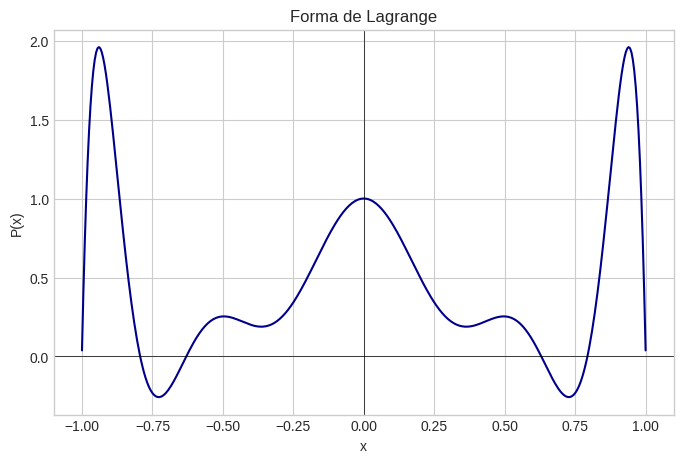

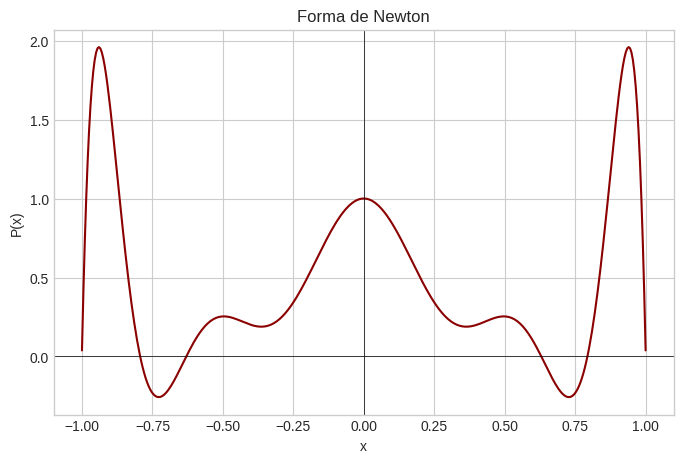

In [ ]:
import numpy as np

def f(t):
  return 1/(1+25*t**2)

n_pontos = 11
xi = np.linspace(-1, 1, n_pontos)
yi = f(xi)

p_Lagrange = interpolacao_Lagrange(xi, yi)

# Cria os valores para o eixo x no intervalo [-1, 1]
x_valores = np.linspace(-1, 1, 400)

# Calcula os valores de y correspondentes
y_valores = p_Lagrange(x_valores)

# Gera o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='darkblue')
plt.title(f'Forma de Lagrange')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


p_Newton = interpolacao_Newton(xi, yi)

y_valores = p_Newton(x_valores)

# Gera o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='darkred')
plt.title(f'Forma de Newton')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

Podemos ver que os polinômios são idênticos, fato que é comprovado pelo resultado apresentado na seção de resumo

---
(c)

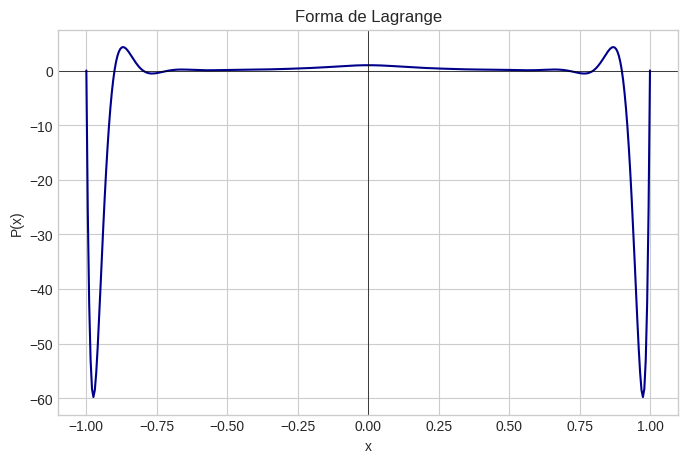

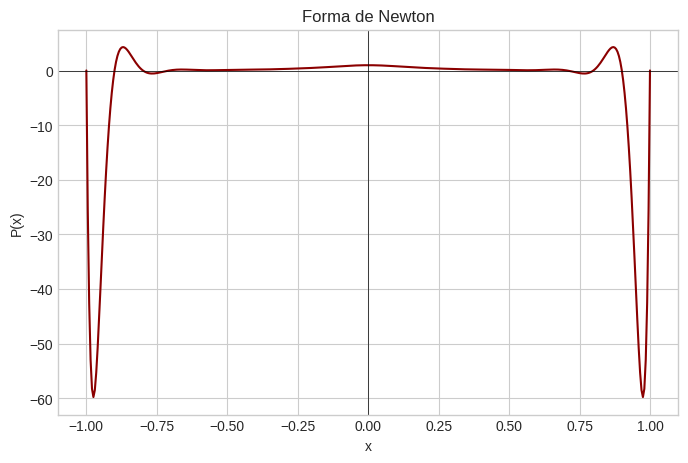

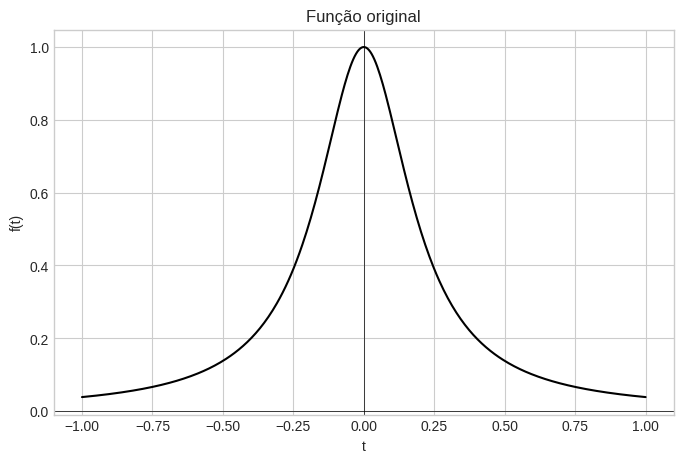

In [ ]:
import numpy as np

def f(t):
  return 1/(1+25*t**2)

n_pontos = 21
xi = np.linspace(-1, 1, n_pontos)
yi = f(xi)

p_Lagrange = interpolacao_Lagrange(xi, yi)

# Cria os valores para o eixo x no intervalo [-1, 1]
x_valores = np.linspace(-1, 1, 400)

# Calcula os valores de y correspondentes
y_valores = p_Lagrange(x_valores)

# Gera o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='darkblue')
plt.title(f'Forma de Lagrange')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


p_Newton = interpolacao_Newton(xi, yi)

y_valores = p_Newton(x_valores)

# Gera o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='darkred')
plt.title(f'Forma de Newton')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


## Gráfico da função original
for i in range(400):
  y_valores[i] = f(x_valores[i])

plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='black')
plt.title(f'Função original')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

Podemos ver que os polinômios divergem da função dada usando mais pontos igualmente espaçados. Isso acontece porque não há garantias de que o polinômio interpolador converge para a função, conforme o número de pontos cresce.

---
(d)

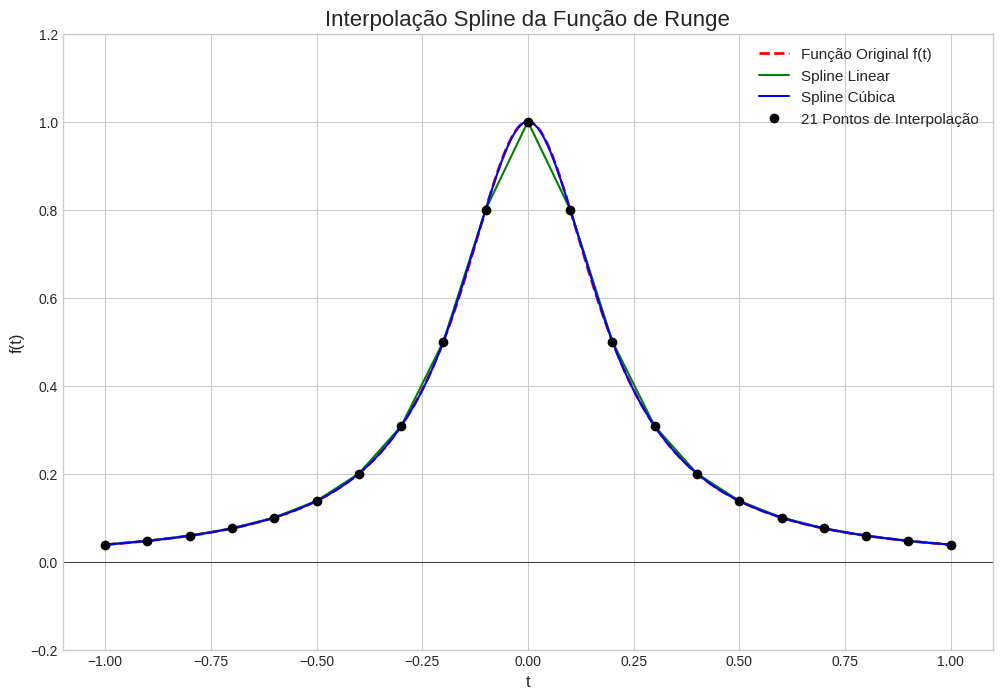

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

n_pontos = 21
x_pontos = np.linspace(-1, 1, n_pontos)
y_pontos = f(x_pontos)

# Spline linear
spline_linear = interp1d(x_pontos, y_pontos, kind='linear')

# Spline cúbica
spline_cubica = interp1d(x_pontos, y_pontos, kind='cubic')

x_grafico = np.linspace(-1, 1, 400)

# Avaliação da função original e das splines nos pontos do gráfico
y_original_grafico = f(x_grafico)
y_linear_grafico = spline_linear(x_grafico)
y_cubica_grafico = spline_cubica(x_grafico)

plt.style.use('seaborn-v0_8-whitegrid') # Estilo do gráfico
plt.figure(figsize=(12, 8))

# Plot da função original
plt.plot(x_grafico, y_original_grafico, 'r--', label='Função Original f(t)', linewidth=2)

# Plot da interpolação com spline linear
plt.plot(x_grafico, y_linear_grafico, 'g-', label='Spline Linear', linewidth=1.5)

# Plot da interpolação com spline cúbica
plt.plot(x_grafico, y_cubica_grafico, 'b-', label='Spline Cúbica', linewidth=1.5)

# Plot dos pontos de interpolação originais
plt.plot(x_pontos, y_pontos, 'ko', label=f'{n_pontos} Pontos de Interpolação', markersize=6)

plt.title('Interpolação Spline da Função de Runge', fontsize=16)
plt.xlabel('t', fontsize=12)
plt.ylabel('f(t)', fontsize=12)
plt.legend(fontsize=11)
plt.ylim(-0.2, 1.2)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

O resultado da interpolação com spline é muito melhor, pois a interpolação é feita por partes. Assim, as extremidades não ficam tão distantes da função original como anteriormente. \\
Comparando os métodos, a spline cúbica fica mais próxima da função, enquanto que a linear não é tão precisa, principalmente em pontos de grande curvatura.

---
(e)

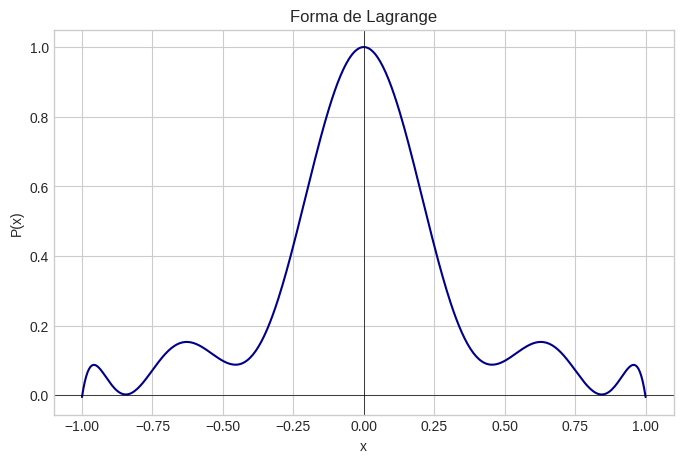

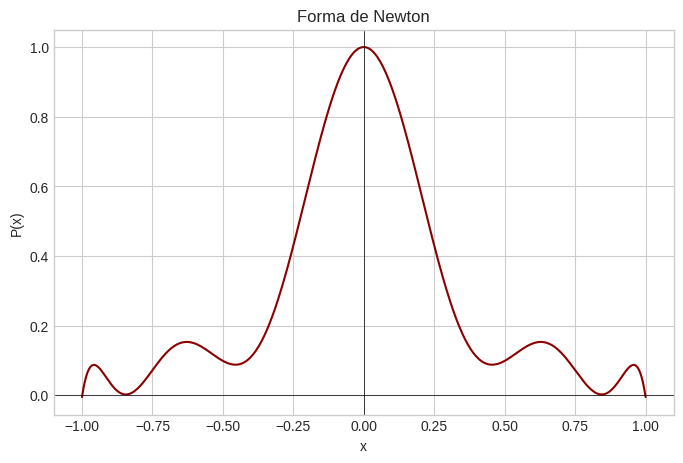

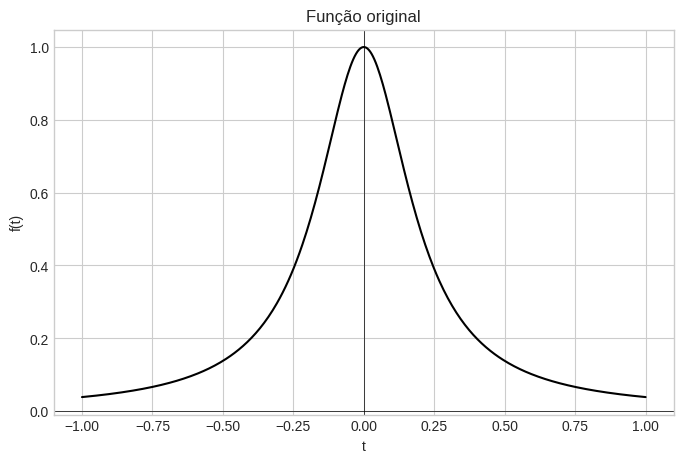

In [ ]:
import numpy as np

def nos_chebyshev(n, a, b):
  k = np.arange(n)
  nos_padrao = np.cos((2 * k + 1) * np.pi / (2 * n))

  nos_mapeados = 0.5 * (a + b) + 0.5 * (b - a) * nos_padrao

  # 3. Retorna os nós em ordem crescente
  return np.sort(nos_mapeados)

n_pontos = 11
xi = nos_chebyshev(n_pontos, -1, 1)
yi = f(xi)

p_Lagrange = interpolacao_Lagrange(xi, yi)

# Cria os valores para o eixo x no intervalo [-1, 1]
x_valores = np.linspace(-1, 1, 400)

# Calcula os valores de y correspondentes
y_valores = p_Lagrange(x_valores)

# Gráfico do polinômio de Lagrange
plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='darkblue')
plt.title(f'Forma de Lagrange')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


p_Newton = interpolacao_Newton(xi, yi)

y_valores = p_Newton(x_valores)

# Gráfico do polinômio de Newton
plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='darkred')
plt.title(f'Forma de Newton')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


# Gráfico da função original
for i in range(400):
  y_valores[i] = f(x_valores[i])

plt.figure(figsize=(8, 5))
plt.plot(x_valores, y_valores, color='black')
plt.title(f'Função original')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

A interpolação usando os nós de Chebyshev melhoram a aproximação, pois tais pontos são os que minimizam o erro cometido, como explicado na seção de resumo.

### 5 Mínimos Quadrados - caso discreto
O método dos mínimos quadrados, no caso discreto, consiste em aproximar uma função $f$ amostrada em $n+1$ pontos distintos, $(x_0, y_0), ... , (x_n, y_n)$, por uma função $F$ que minimize o valor $\|F - f\|^2$. \\
Para este exercício, iremos explorar os casos onde $F$ é um polinômio de grau $m < n$ ou uma exponencial da forma $ab^x$.
#### Aproximação polinomial
Estamos buscando um polinômio $P_m(x) = a_0 + a_1x + ... + a_mx^m$ que melhor aproxima a função amostrada, no sentido dos mínimos quadrados. Isso significa encontrar o polinômio que minimiza o quadrado da distância de cada ponto $(x_i, y_i)$ até o gráfico de $P_m(x)$ \\
Sejam os vetores:
$$
u_0 =
\begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix} \text{ , }
u_1 =
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_n
\end{bmatrix} \text{ , ... ,}
u_m =
\begin{bmatrix}
x_0^m \\
x_1^m \\
\vdots \\
x_n^m
\end{bmatrix}
$$
Dada a base $\mathcal{B} = \{1, x, ..., x^m\}$ do espaço dos polinômios de grau $m$, basta resolver o sistema:
$$
\begin{bmatrix}
\langle u_0, u_0 \rangle & \langle u_0, u_1 \rangle & \langle u_0, u_2 \rangle & \dots & \langle u_0, u_m \rangle \\
\langle u_1, u_0 \rangle & \langle u_1, u_1 \rangle & \langle u_1, u_2 \rangle & \dots & \langle u_1, u_m \rangle \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\langle u_m, u_0 \rangle & \langle u_m, u_1 \rangle & \langle u_m, u_2 \rangle & \dots & \langle u_m, u_m \rangle \\
\end{bmatrix}
\cdot
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}
=
\begin{bmatrix}
\langle u_0, y \rangle \\
\langle u_1 , y \rangle \\
\vdots \\
\langle u_m, y \rangle
\end{bmatrix}
$$
Isto é, encontrar a projeção ortogonal de $y$ no subespaço vetorial gerado por $\{u_0, u_1, ... , u_m\}$. \\
Uma outra forma de escrever este sistema é:
$$
\begin{bmatrix}
1 & 1 & \dots & 1 \\
x_0 & x_1 & \dots & x_n \\
\vdots & \vdots & \ddots & \vdots \\
x_0^m & x_1^m & \dots & x_n^m
\end{bmatrix}
\begin{bmatrix}
1 & x_0 & \dots & x_0^m \\
1 & x_1 & \dots & x_1^m \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_n & \dots & x_n^m
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_m
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & \dots & 1 \\
x_0 & x_1 & \dots & x_n \\
\vdots & \vdots & \ddots & \vdots \\
x_0^m & x_1^m & \dots & x_n^m
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{bmatrix}
$$
A matriz que aparece do lado esquerdo é uma matriz de Vandermond, Χ. A expressão é:
$$
Χ^TΧa = Χ^Ty
$$
Usando a decomposição QR de Χ, e sabendo que Q é ortogonal, isto é, $Q^TQ = I$:
$$
(QR)^T(QR)a = (QR)^Ty \\
R^TQ^TQRa = R^TQ^Ty \\
Ra = Q^Ty
$$
Portanto, resolvendo o sistema acima (R é triangular superior, o que facilita), temos os coeficientes do polinômio.
#### Aproximação por $ab^x$
Para este caso, vamos linearizar o problema:
$$
f(x) \approx ab^x
\implies ln(f(x)) \approx ln(a) \cdot 1 + ln(b) \cdot x
$$
Podemos, agora, usar o Método dos Mínimos Quadrados para aproximar $ln(f(x))$ por uma função linear. Suponha que $f$ foi amostrada em $x_0, x_1, ... , x_n$ com valores $y = \{y_0, y_1, ... , y_n\}$. Sendo $ln(a) = a_0$, $1 = ϕ_0$, $ln(b) = a_1$, $x = ϕ_1$, calculamos também $\phi_0$ e $\phi_1$ nestes pontos e resolvemos o sistema, usando o produto interno usual do $\mathbb{R}^n$:
$$
\begin{bmatrix}
\langle \phi_0, \phi_0 \rangle & \langle \phi_0, \phi_1 \rangle \\
\langle \phi_1, \phi_0 \rangle & \langle \phi_1, \phi_1 \rangle
\end{bmatrix}
\begin{bmatrix}
a_0 \\
a_1
\end{bmatrix}
=
\begin{bmatrix}
\langle \phi_0, Y \rangle \\
\langle \phi_1, Y \rangle
\end{bmatrix} \\
\text{onde } Y =
\begin{bmatrix}
ln(y_0) \\
ln(y_1) \\
\vdots \\
ln(y_n)
\end{bmatrix}
$$
Ao fim, temos $a = e^{a_0}$ e $b = e^{a_1}$.

In [56]:
# Preparação dos dados e declaração das funções para resolver os itens.

import numpy as np
import matplotlib.pyplot as plt

def mmqQR(x,y,k):
  X = np.vander(x,k)
  (Q,R) = np.linalg.qr(X)
  b = np.transpose(Q).dot(y)
  a = np.linalg.solve(R,b)
  return a

def erro_truncamento(y_reais, y_estimados):
  return np.sum((y_reais - y_estimados)**2)

arquivo = 'casosacumuladosbrasilatuaizado.txt'

casos_lista = []


with open(arquivo, 'r') as arquivo:
  for linha in arquivo:
    # Remove espaços em branco e quebras de linha, depois converte para inteiro
    if linha.strip(): # Garante que a linha não está vazia
      numero_de_casos = int(linha.strip())
      casos_lista.append(numero_de_casos)

y_valores = np.array(casos_lista)
# Cada x é o número do dia relacionado ao número de casos; há 118 dias no período analisado.
x_valores = np.arange(1, 119)

---
(a) A primeira função resolve o sistema $Χ^TΧa = Χ^Ty$, onde $Χ$ é a matriz de Vandermond. Já a segunda função utiliza a decomposição QR de $Χ$ e resolve $Ra = Q^Ty$, que é uma alternativa melhor, já que $R$ é triangular superior.

---
(b)

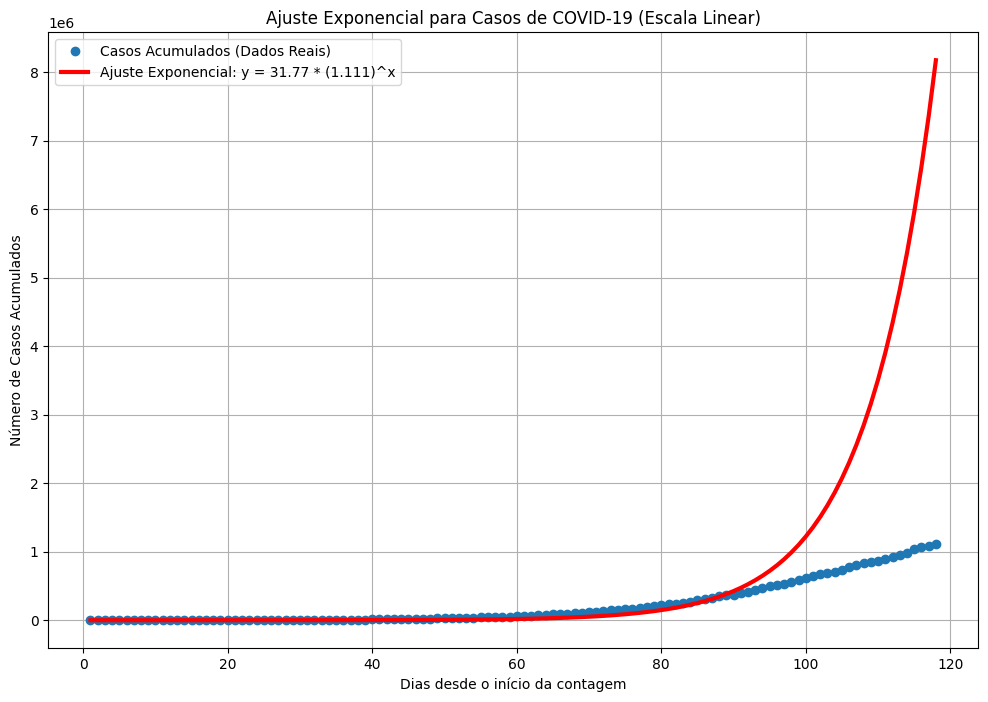

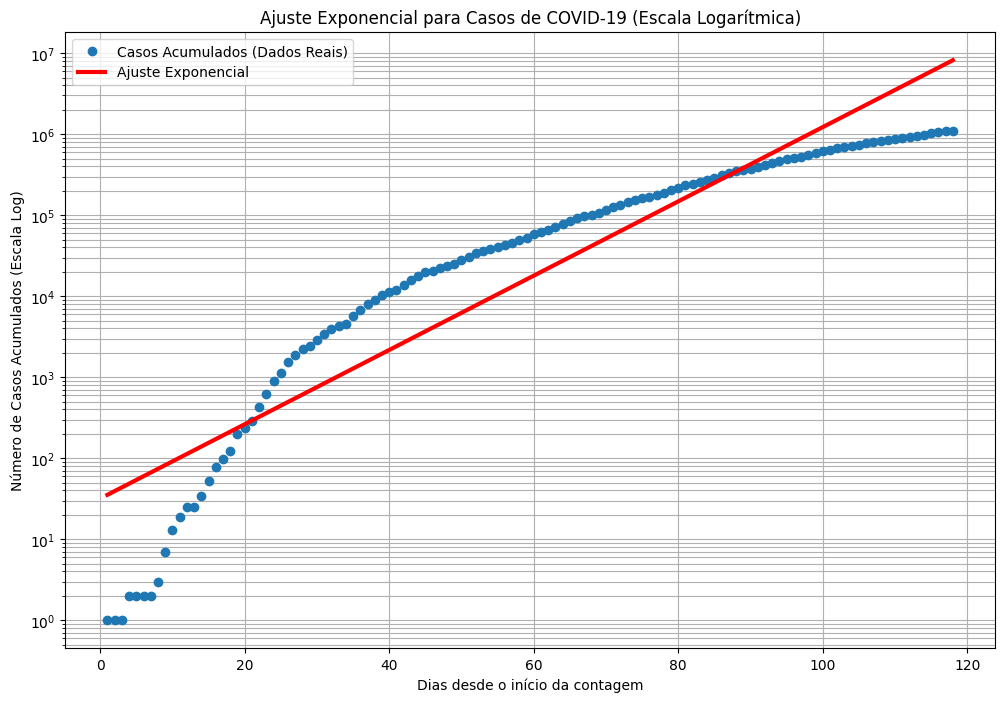

In [50]:
# Linearização do problema:
y_log = np.log(y_valores)

coefs = mmqQR(x_valores, y_log, 2) # Queremos aproximar ln(f(x)) por um polinômio de grau 1.

# Desfazendo a operação de log:
a = np.exp(coefs[1])
b = np.exp(coefs[0])

# Plotando o gráfico da aproximação:
# Cria a função do modelo encontrado para facilitar a plotagem
def exponencial(x, a, b):
  return a * (b ** x)

# Calcula os valores do ajuste para plotar a curva
y_ajuste = modelo_exponencial(x_valores, a, b)


# --- Gráfico 1: Escala Linear ---
plt.figure(figsize=(12, 8))
# Plota os dados originais
plt.plot(x_valores, y_valores, 'o', label='Casos Acumulados (Dados Reais)')
# Plota a curva do modelo ajustado
plt.plot(x_valores, y_ajuste, 'r-', linewidth=3, label=f'Ajuste Exponencial: y = {a:.2f} * ({b:.3f})^x')

plt.title('Ajuste Exponencial para Casos de COVID-19 (Escala Linear)')
plt.xlabel('Dias desde o início da contagem')
plt.ylabel('Número de Casos Acumulados')
plt.legend()
plt.grid(True)
plt.show()


# --- Gráfico 2: Escala Logarítmica (muito útil para ver a qualidade do ajuste) ---
plt.figure(figsize=(12, 8))
# Plota os dados originais em escala log
plt.plot(x_valores, y_valores, 'o', label='Casos Acumulados (Dados Reais)')
# Plota a curva do modelo ajustado
plt.plot(x_valores, y_ajuste, 'r-', linewidth=3, label='Ajuste Exponencial')

# Altera a escala do eixo Y para logarítmica
plt.yscale('log')

plt.title('Ajuste Exponencial para Casos de COVID-19 (Escala Logarítmica)')
plt.xlabel('Dias desde o início da contagem')
plt.ylabel('Número de Casos Acumulados (Escala Log)')
plt.legend()
plt.grid(True, which="both", ls="-") # Grade para ambas as escalas
plt.show()

---
(c)

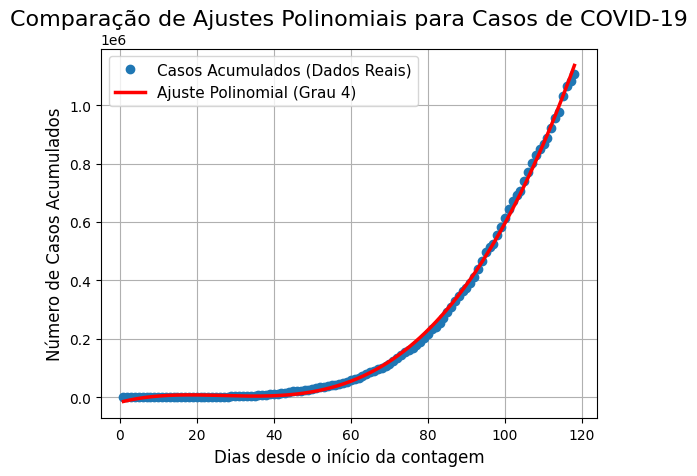

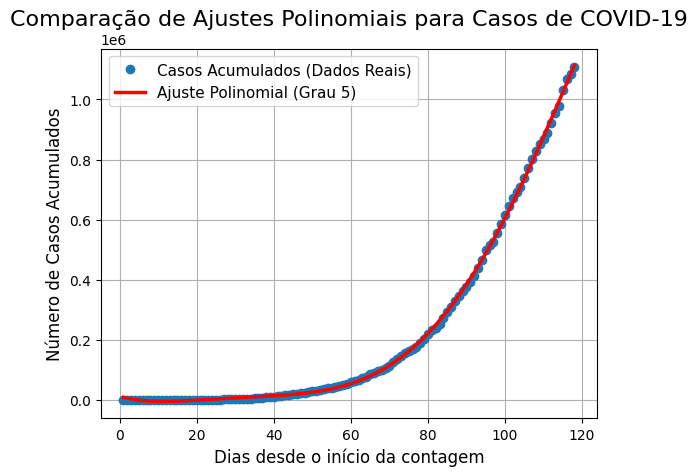

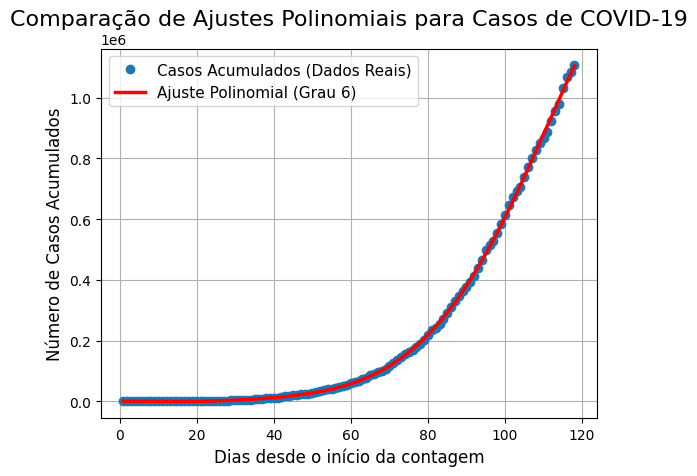

In [51]:
graus = [4, 5, 6]
for m in graus:
  coefs = mmqQR(x_valores, y_valores, m+1)

  polinomio = np.poly1d(coefs)

  # Plot do gráfico
  x = np.linspace(x_valores.min(), x_valores.max(), 500)
  y = polinomio(x)

  # Plota os dados reais
  plt.plot(x_valores, y_valores, 'o', label='Casos Acumulados (Dados Reais)')
  # Plota o polinômio
  plt.plot(x, y, 'r-', linewidth=2.5, label=f'Ajuste Polinomial (Grau {m})')

  plt.title('Comparação de Ajustes Polinomiais para Casos de COVID-19', fontsize=16)
  plt.xlabel('Dias desde o início da contagem', fontsize=12)
  plt.ylabel('Número de Casos Acumulados', fontsize=12)
  plt.legend(fontsize=11)
  plt.grid(True)
  plt.show()

---
(d)

In [64]:
# Erro de truncamento na aproximação por g(x) = ab^x:
erro = erro_truncamento(y_valores, exponencial(x_valores, a, b))
print(f"Erro de truncamento para a exponencial: {erro:.1e}")

# Erro de truncamento na aproximação por polinômio:
graus = [4, 5, 6]
for m in graus:
  coefs = mmqQR(x_valores, y_valores, m+1)
  polinomio = np.poly1d(coefs)
  erro = erro_truncamento(y_valores, polinomio(x_valores))
  print(f"Erro de truncamento com m = {m}: {erro:.1e}")

Erro de truncamento para a exponencial: 2.3e+14
Erro de truncamento com m = 4: 1.2e+10
Erro de truncamento com m = 5: 4.1e+09
Erro de truncamento com m = 6: 3.1e+09


Podemos ver que, para o período completo, as aproximações por polinômios resultam em erros de truncamento menores, dado que a função exponencial se distancia muito dos dados reais na porção final do período. \\
Entre os polinômios, nota-se que o erro diminui à medida que o grau do polinômio aumenta. \\
Uma observação: como estamos lidando com valores muito altos, da ordem de milhares e milhões, os erros de truncamento são números muito grandes, mas isso não é um problema.

---
(e)

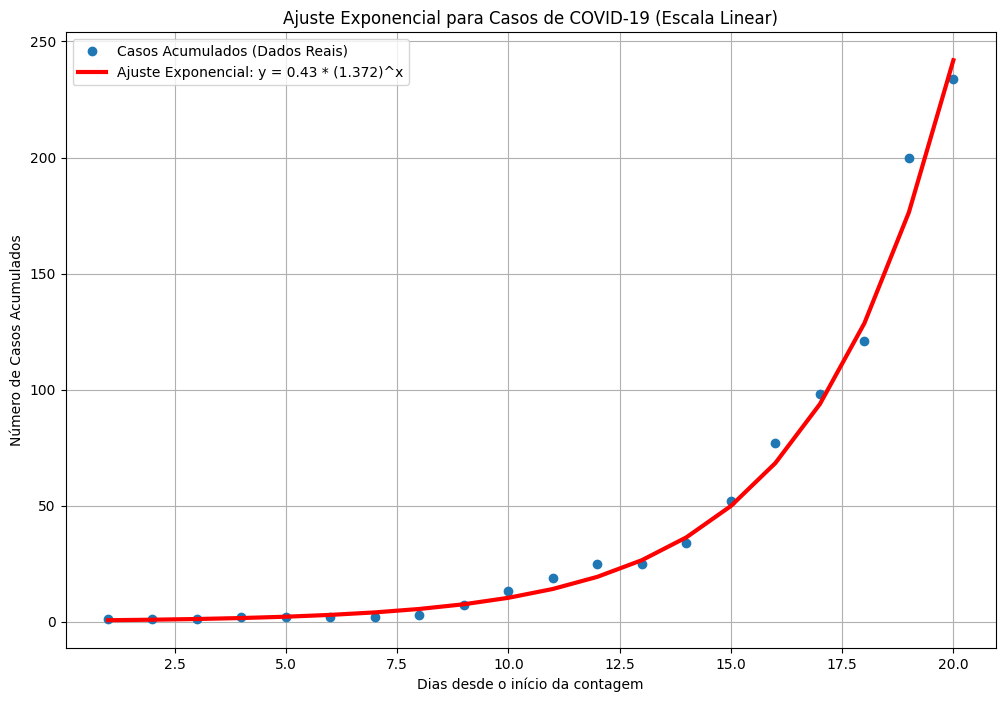

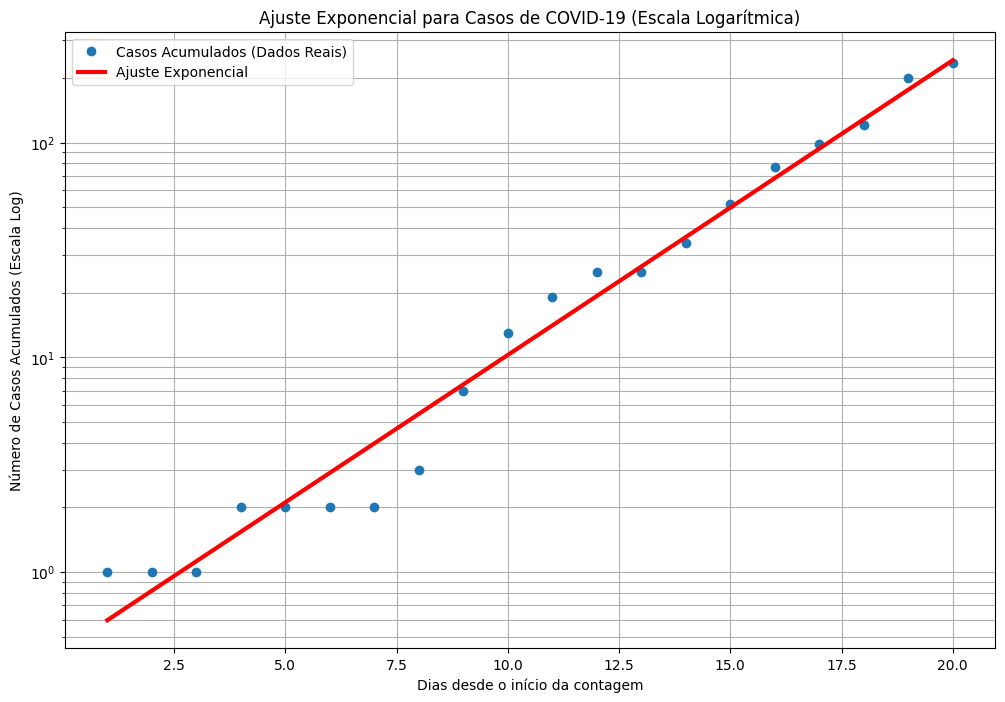

In [65]:
# Selecionando apenas os primeiros 20 dias:
x_primeiros_20 = x_valores[:20]
y_primeiros_20 = y_valores[:20]

# Aproximação exponencial para os 20 primeiros dias
y_log = np.log(y_primeiros_20)

coefs = mmqQR(x_primeiros_20, y_log, 2) # Queremos aproximar ln(f(x)) por um polinômio de grau 1.

# Desfazendo a operação de log:
a = np.exp(coefs[1])
b = np.exp(coefs[0])

# Plotando o gráfico da aproximação:
# Cria a função do modelo encontrado para facilitar a plotagem
def exponencial(x, a, b):
  return a * (b ** x)

# Calcula os valores do ajuste para plotar a curva
y_ajuste = modelo_exponencial(x_primeiros_20, a, b)


# --- Gráfico 1: Escala Linear ---
plt.figure(figsize=(12, 8))
# Plota os dados originais
plt.plot(x_primeiros_20, y_primeiros_20, 'o', label='Casos Acumulados (Dados Reais)')
# Plota a curva do modelo ajustado
plt.plot(x_primeiros_20, y_ajuste, 'r-', linewidth=3, label=f'Ajuste Exponencial: y = {a:.2f} * ({b:.3f})^x')

plt.title('Ajuste Exponencial para Casos de COVID-19 (Escala Linear)')
plt.xlabel('Dias desde o início da contagem')
plt.ylabel('Número de Casos Acumulados')
plt.legend()
plt.grid(True)
plt.show()


# --- Gráfico 2: Escala Logarítmica (muito útil para ver a qualidade do ajuste) ---
plt.figure(figsize=(12, 8))
# Plota os dados originais em escala log
plt.plot(x_primeiros_20, y_primeiros_20, 'o', label='Casos Acumulados (Dados Reais)')
# Plota a curva do modelo ajustado
plt.plot(x_primeiros_20, y_ajuste, 'r-', linewidth=3, label='Ajuste Exponencial')

# Altera a escala do eixo Y para logarítmica
plt.yscale('log')

plt.title('Ajuste Exponencial para Casos de COVID-19 (Escala Logarítmica)')
plt.xlabel('Dias desde o início da contagem')
plt.ylabel('Número de Casos Acumulados (Escala Log)')
plt.legend()
plt.grid(True, which="both", ls="-") # Grade para ambas as escalas
plt.show()

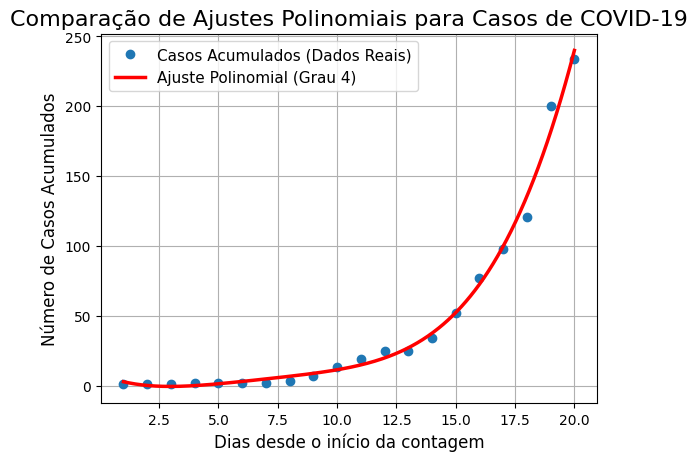

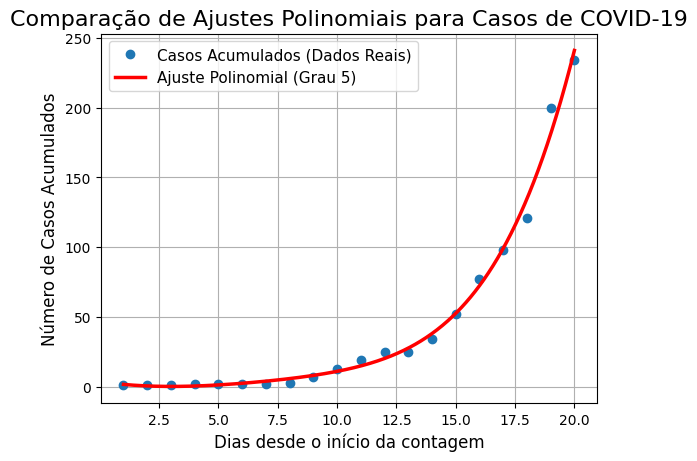

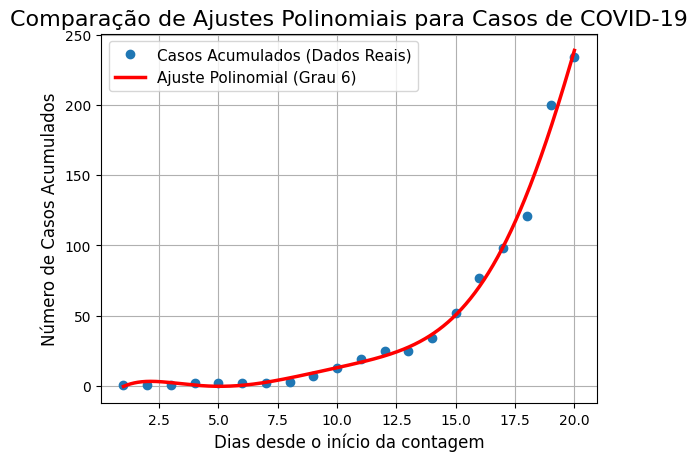

In [66]:
# Aproximação polinomial para os 20 primeiros dias
graus = [4, 5, 6]
for m in graus:
  coefs = mmqQR(x_primeiros_20, y_primeiros_20, m+1)

  polinomio = np.poly1d(coefs)

  # Plot do gráfico
  x = np.linspace(x_primeiros_20.min(), x_primeiros_20.max(), 500)
  y = polinomio(x)

  # Plota os dados reais
  plt.plot(x_primeiros_20, y_primeiros_20, 'o', label='Casos Acumulados (Dados Reais)')
  # Plota o polinômio
  plt.plot(x, y, 'r-', linewidth=2.5, label=f'Ajuste Polinomial (Grau {m})')

  plt.title('Comparação de Ajustes Polinomiais para Casos de COVID-19', fontsize=16)
  plt.xlabel('Dias desde o início da contagem', fontsize=12)
  plt.ylabel('Número de Casos Acumulados', fontsize=12)
  plt.legend(fontsize=11)
  plt.grid(True)
  plt.show()

In [67]:
# Erros de truncamento
# Erro de truncamento na aproximação por g(x) = ab^x:
erro = erro_truncamento(y_primeiros_20, exponencial(x_primeiros_20, a, b))
print(f"Erro de truncamento para a exponencial: {erro:.1e}")

# Erro de truncamento na aproximação por polinômio:
graus = [4, 5, 6]
for m in graus:
  coefs = mmqQR(x_primeiros_20, y_primeiros_20, m+1)
  polinomio = np.poly1d(coefs)
  erro = erro_truncamento(y_primeiros_20, polinomio(x_primeiros_20))
  print(f"Erro de truncamento com m = {m}: {erro:.1e}")

Erro de truncamento para a exponencial: 8.6e+02
Erro de truncamento com m = 4: 7.1e+02
Erro de truncamento com m = 5: 7.0e+02
Erro de truncamento com m = 6: 6.4e+02


---
(f)

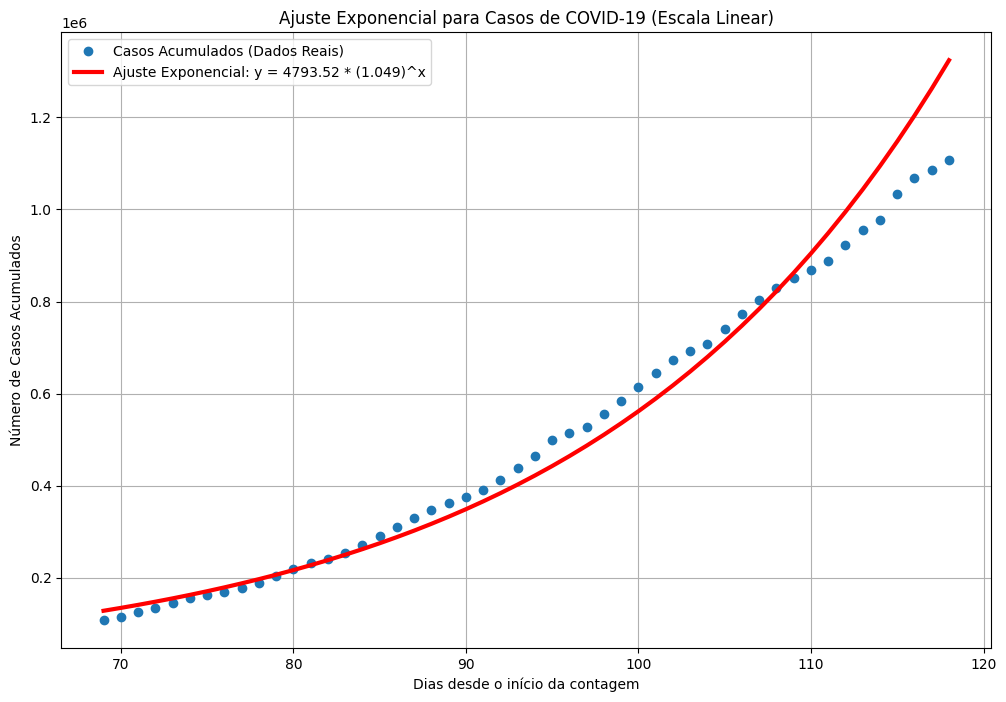

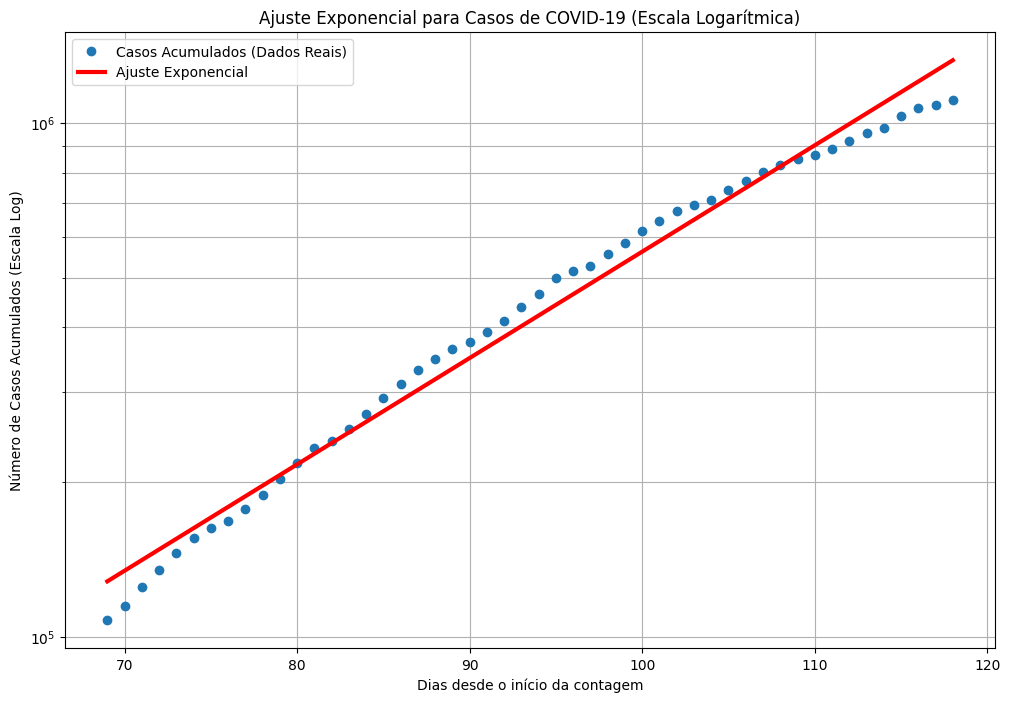

In [69]:
# Selecionando apenas os últimos 50 dias:
x_ultimos_50 = x_valores[-50:]
y_ultimos_50 = y_valores[-50:]

# Aproximação exponencial para os últimos 50 dias
y_log = np.log(y_ultimos_50)

coefs = mmqQR(x_ultimos_50, y_log, 2) # Queremos aproximar ln(f(x)) por um polinômio de grau 1.

# Desfazendo a operação de log:
a = np.exp(coefs[1])
b = np.exp(coefs[0])

# Plotando o gráfico da aproximação:
# Cria a função do modelo encontrado para facilitar a plotagem
def exponencial(x, a, b):
  return a * (b ** x)

# Calcula os valores do ajuste para plotar a curva
y_ajuste = modelo_exponencial(x_ultimos_50, a, b)


# --- Gráfico 1: Escala Linear ---
plt.figure(figsize=(12, 8))
# Plota os dados originais
plt.plot(x_ultimos_50, y_ultimos_50, 'o', label='Casos Acumulados (Dados Reais)')
# Plota a curva do modelo ajustado
plt.plot(x_ultimos_50, y_ajuste, 'r-', linewidth=3, label=f'Ajuste Exponencial: y = {a:.2f} * ({b:.3f})^x')

plt.title('Ajuste Exponencial para Casos de COVID-19 (Escala Linear)')
plt.xlabel('Dias desde o início da contagem')
plt.ylabel('Número de Casos Acumulados')
plt.legend()
plt.grid(True)
plt.show()


# --- Gráfico 2: Escala Logarítmica (muito útil para ver a qualidade do ajuste) ---
plt.figure(figsize=(12, 8))
# Plota os dados originais em escala log
plt.plot(x_ultimos_50, y_ultimos_50, 'o', label='Casos Acumulados (Dados Reais)')
# Plota a curva do modelo ajustado
plt.plot(x_ultimos_50, y_ajuste, 'r-', linewidth=3, label='Ajuste Exponencial')

# Altera a escala do eixo Y para logarítmica
plt.yscale('log')

plt.title('Ajuste Exponencial para Casos de COVID-19 (Escala Logarítmica)')
plt.xlabel('Dias desde o início da contagem')
plt.ylabel('Número de Casos Acumulados (Escala Log)')
plt.legend()
plt.grid(True, which="both", ls="-") # Grade para ambas as escalas
plt.show()

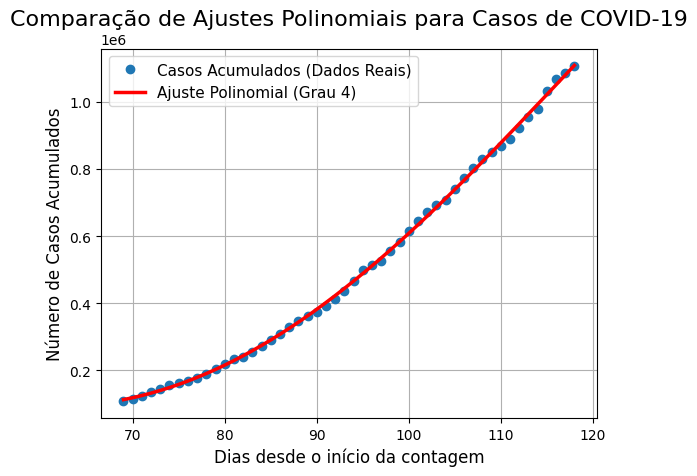

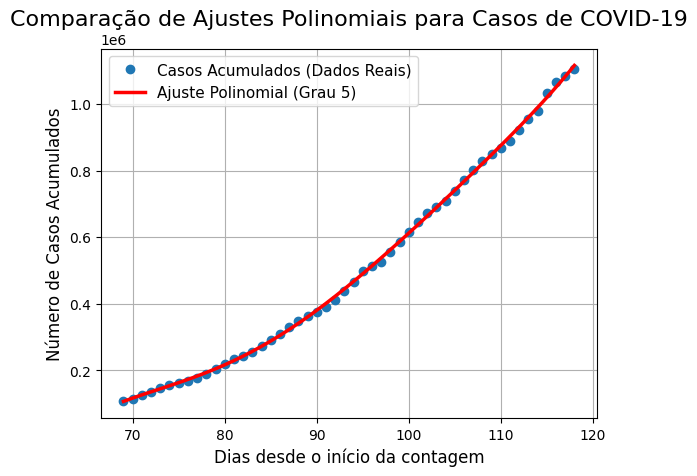

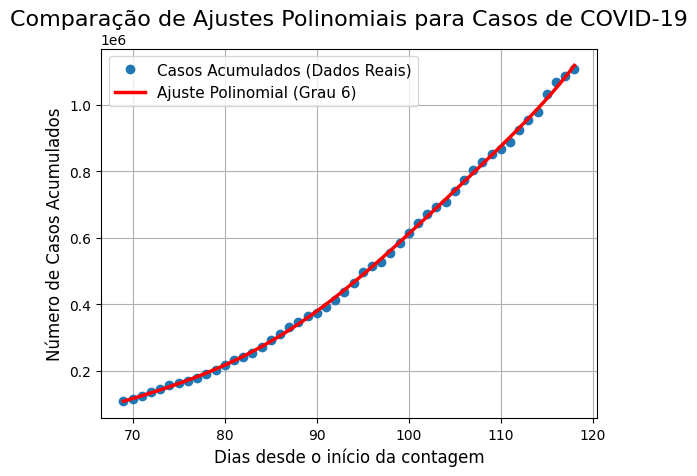

In [70]:
# Aproximação polinomial para os últimos 50 dias
graus = [4, 5, 6]
for m in graus:
  coefs = mmqQR(x_ultimos_50, y_ultimos_50, m+1)

  polinomio = np.poly1d(coefs)

  # Plot do gráfico
  x = np.linspace(x_ultimos_50.min(), x_ultimos_50.max(), 500)
  y = polinomio(x)

  # Plota os dados reais
  plt.plot(x_ultimos_50, y_ultimos_50, 'o', label='Casos Acumulados (Dados Reais)')
  # Plota o polinômio
  plt.plot(x, y, 'r-', linewidth=2.5, label=f'Ajuste Polinomial (Grau {m})')

  plt.title('Comparação de Ajustes Polinomiais para Casos de COVID-19', fontsize=16)
  plt.xlabel('Dias desde o início da contagem', fontsize=12)
  plt.ylabel('Número de Casos Acumulados', fontsize=12)
  plt.legend(fontsize=11)
  plt.grid(True)
  plt.show()

In [71]:
# Erros de truncamento
# Erro de truncamento na aproximação por g(x) = ab^x:
erro = erro_truncamento(y_ultimos_50, exponencial(x_ultimos_50, a, b))
print(f"Erro de truncamento para a exponencial: {erro:.1e}")

# Erro de truncamento na aproximação por polinômio:
graus = [4, 5, 6]
for m in graus:
  coefs = mmqQR(x_ultimos_50, y_ultimos_50, m+1)
  polinomio = np.poly1d(coefs)
  erro = erro_truncamento(y_ultimos_50, polinomio(x_ultimos_50))
  print(f"Erro de truncamento com m = {m}: {erro:.1e}")

Erro de truncamento para a exponencial: 1.8e+11
Erro de truncamento com m = 4: 2.7e+09
Erro de truncamento com m = 5: 2.3e+09
Erro de truncamento com m = 6: 2.2e+09


#### Análise - 20 primeiros dias
Nesse caso, os erros foram bem próximos entre si. A aproximação exponencial, embora tenha mostrado o maior erro de truncamento, ajustou-se muito melhor aos dados do início do período, o que condiz com a teoria sobre disseminação de um vírus em uma população. \\
O motivo pelo qual os polinômios apresentaram um erro menor pode ser a flexibilidade de tais funções a se adaptarem aos dados, o baixo número de casos no período, dificultando a adequação da curva exponencial aos dados, entre outros fatores. O importante é notar que a exponencial se saiu bem melhor neste período, com relação ao período completo.

#### Análise - Últimos 50 dias
Neste período, a aproximação exponencial mostrou um erro bem maior que as polinomiais, pois as políticas de isolamento social já estavam fazendo efeito no número de casos, corroborando para que a curva real de crescimento ficasse abaixo da exponencial. \\
Os polinômios, por sua grande flexiblidade, conseguiram se adequar bem aos dados e obtiveram erros de truncamento menores.